**Connect to drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Set up the folders

In [ ]:
import os
import random
import re
from PIL import Image

DATA_PATH = '/content/drive/My Drive/ThesisDL/IOUsemSeg'
MASK_PATH='/content/drive/My Drive/ThesisDL/IOUsemSeg/Nuc_Masks'
FRAME_PATH = '/content/drive/My Drive/ThesisDL/IOUsemSeg/Regression_Composites'



# Create folders to hold images and masks

folders = ['train_frames', 'train_masks', 'val_frames', 'val_masks', 'test_frames', 'test_masks']


for folder in folders:
  os.makedirs(DATA_PATH + '/' + folder)
  
  
# Get all frames and masks, sort them, shuffle them to generate data sets.






FileExistsError: ignored

In [ ]:
all_frames = os.listdir('/content/drive/My Drive/ThesisDL/IOUsemSeg/Regression_Composites')
all_masks = os.listdir('/content/drive/My Drive/ThesisDL/IOUsemSeg/Nuc_Masks')

In [ ]:
all_frames.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[^0-9]|[0-9]+', var)])
all_masks.sort(key=lambda var:[int(x) if x.isdigit() else x 
                               for x in re.findall(r'[^0-9]|[0-9]+', var)])
index=range(len(all_frames))
index2=[i for i in index]
#print(all_frames)
#print(all_masks)
random.seed(230)
random.shuffle(index2)
#print(index2)
#print(len(index2))


train_split = int(0.7*len(index2))
val_split = int(0.9 * len(index2))

train_idx = index2[:train_split]
val_idx = index2[train_split:val_split]
test_idx = index2[val_split:]

print(all_masks[train_idx[0]])
print(all_frames[train_idx[0]])

train_frames=[]
train_masks=[]
val_frames=[]
val_masks=[]
test_frames=[]
test_masks=[]

for idx in train_idx:
  #print(idx)
  train_frames.append(all_frames[idx])
  train_masks.append(all_masks[idx])

for idx in val_idx:
  #print(idx)
  val_frames.append(all_frames[idx])
  val_masks.append(all_masks[idx])

for idx in test_idx:
  #print(idx)
  test_frames.append(all_frames[idx])
  test_masks.append(all_masks[idx])

NucMask00455.png
compositeReg00455.tif


In [ ]:
random.seed(230)
random.shuffle(all_frames)
random.seed(230)
random.shuffle(all_masks)


# Generate train, val, and test sets for frames

train_split = int(0.7*len(all_frames))
val_split = int(0.9 * len(all_frames))

train_frames = all_frames[:train_split]
val_frames = all_frames[train_split:val_split]
test_frames = all_frames[val_split:]


print(val_split)

954


In [ ]:
# Generate corresponding mask lists for masks

#train_masks = all_masks[:train_split]
#val_masks = all_masks[train_split:val_split]
#test_masks = all_masks[val_split:]


#Add train, val, test frames and masks to relevant folders
print(train_masks)
print(train_frames)


['NucMask00455.png', 'NucMask00232.png', 'NucMask00375.png', 'NucMask00226.png', 'NucMask00487.png', 'NucMask00933.png', 'NucMask00717.png', 'NucMask00867.png', 'NucMask00537.png', 'NucMask00559.png', 'NucMask00697.png', 'NucMask00796.png', 'NucMask00085.png', 'NucMask00608.png', 'NucMask00648.png', 'NucMask00976.png', 'NucMask00946.png', 'NucMask00849.png', 'NucMask00494.png', 'NucMask00240.png', 'NucMask00853.png', 'NucMask00348.png', 'NucMask00682.png', 'NucMask00241.png', 'NucMask00769.png', 'NucMask00719.png', 'NucMask00399.png', 'NucMask00759.png', 'NucMask00454.png', 'NucMask00520.png', 'NucMask00126.png', 'NucMask00879.png', 'NucMask00033.png', 'NucMask00778.png', 'NucMask00038.png', 'NucMask00221.png', 'NucMask00572.png', 'NucMask00809.png', 'NucMask00605.png', 'NucMask00260.png', 'NucMask00220.png', 'NucMask00099.png', 'NucMask00732.png', 'NucMask01001.png', 'NucMask01022.png', 'NucMask00105.png', 'NucMask00797.png', 'NucMask00427.png', 'NucMask00212.png', 'NucMask00708.png',

In [ ]:
DATA_PATH = '/content/drive/My Drive/ThesisDL/IOUsemSeg'
MASK_PATH='/content/drive/My Drive/ThesisDL/IOUsemSeg/Nuc_Masks'
FRAME_PATH = '/content/drive/My Drive/ThesisDL/IOUsemSeg/Regression_Composites'

def add_frames(dir_name, image):
  
  img = Image.open(FRAME_PATH + '/' +image)
  img.save(DATA_PATH+'/{}'.format(dir_name)+'/'+image)
  
  
  
def add_masks(dir_name, image):
  
  img = Image.open(MASK_PATH+ '/' +image)
  img.save(DATA_PATH+'/{}'.format(dir_name)+'/'+image)


  
  
frame_folders = [(train_frames, 'train_frames'), (val_frames, 'val_frames'), 
                 (test_frames, 'test_frames')]

mask_folders = [(train_masks, 'train_masks'), (val_masks, 'val_masks'), 
                (test_masks, 'test_masks')]

print(mask_folders)

[(['NucMask00455.png', 'NucMask00232.png', 'NucMask00375.png', 'NucMask00226.png', 'NucMask00487.png', 'NucMask00933.png', 'NucMask00717.png', 'NucMask00867.png', 'NucMask00537.png', 'NucMask00559.png', 'NucMask00697.png', 'NucMask00796.png', 'NucMask00085.png', 'NucMask00608.png', 'NucMask00648.png', 'NucMask00976.png', 'NucMask00946.png', 'NucMask00849.png', 'NucMask00494.png', 'NucMask00240.png', 'NucMask00853.png', 'NucMask00348.png', 'NucMask00682.png', 'NucMask00241.png', 'NucMask00769.png', 'NucMask00719.png', 'NucMask00399.png', 'NucMask00759.png', 'NucMask00454.png', 'NucMask00520.png', 'NucMask00126.png', 'NucMask00879.png', 'NucMask00033.png', 'NucMask00778.png', 'NucMask00038.png', 'NucMask00221.png', 'NucMask00572.png', 'NucMask00809.png', 'NucMask00605.png', 'NucMask00260.png', 'NucMask00220.png', 'NucMask00099.png', 'NucMask00732.png', 'NucMask01001.png', 'NucMask01022.png', 'NucMask00105.png', 'NucMask00797.png', 'NucMask00427.png', 'NucMask00212.png', 'NucMask00708.png

In [ ]:
print(frame_folders)

[(['compositeReg00455.tif', 'compositeReg00232.tif', 'compositeReg00375.tif', 'compositeReg00226.tif', 'compositeReg00487.tif', 'compositeReg00933.tif', 'compositeReg00717.tif', 'compositeReg00867.tif', 'compositeReg00537.tif', 'compositeReg00559.tif', 'compositeReg00697.tif', 'compositeReg00796.tif', 'compositeReg00085.tif', 'compositeReg00608.tif', 'compositeReg00648.tif', 'compositeReg00976.tif', 'compositeReg00946.tif', 'compositeReg00849.tif', 'compositeReg00494.tif', 'compositeReg00240.tif', 'compositeReg00853.tif', 'compositeReg00348.tif', 'compositeReg00682.tif', 'compositeReg00241.tif', 'compositeReg00769.tif', 'compositeReg00719.tif', 'compositeReg00399.tif', 'compositeReg00759.tif', 'compositeReg00454.tif', 'compositeReg00520.tif', 'compositeReg00126.tif', 'compositeReg00879.tif', 'compositeReg00033.tif', 'compositeReg00778.tif', 'compositeReg00038.tif', 'compositeReg00221.tif', 'compositeReg00572.tif', 'compositeReg00809.tif', 'compositeReg00605.tif', 'compositeReg00260.tif

In [ ]:
# Add frames

for folder in frame_folders:
  
  array = folder[0]
  name = [folder[1]] * len(array)
  print(name)
  list(map(add_frames, name, array))
         


['train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_frames', 'train_

In [ ]:
print(array)
print(name)

['compositeReg00270.tif', 'compositeReg00500.tif', 'compositeReg00479.tif', 'compositeReg00498.tif', 'compositeReg00194.tif', 'compositeReg00269.tif', 'compositeReg00995.tif', 'compositeReg00324.tif', 'compositeReg00777.tif', 'compositeReg00518.tif', 'compositeReg00920.tif', 'compositeReg00629.tif', 'compositeReg00344.tif', 'compositeReg00624.tif', 'compositeReg00591.tif', 'compositeReg00371.tif', 'compositeReg00837.tif', 'compositeReg00146.tif', 'compositeReg00566.tif', 'compositeReg01042.tif', 'compositeReg00711.tif', 'compositeReg00984.tif', 'compositeReg00295.tif', 'compositeReg00550.tif', 'compositeReg00339.tif', 'compositeReg00039.tif', 'compositeReg00567.tif', 'compositeReg00569.tif', 'compositeReg00633.tif', 'compositeReg00834.tif', 'compositeReg00405.tif', 'compositeReg00142.tif', 'compositeReg00048.tif', 'compositeReg00744.tif', 'compositeReg00945.tif', 'compositeReg00507.tif', 'compositeReg00294.tif', 'compositeReg00230.tif', 'compositeReg00107.tif', 'compositeReg00660.tif',

In [ ]:
    
# Add masks

for folder in mask_folders:
  
  array = folder[0]
  name = [folder[1]] * len(array)
  
  list(map(add_masks, name, array))

In [ ]:
Rflip=random.random()
print(Rflip)

0.1525975064911338


**CUSTOM GENERATOR**

In [2]:
import cv2
import os
import os
import random
import re
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
tf.compat.v1.enable_eager_execution()

def data_gen(img_folder, mask_folder, batch_size,imsize=128):
  c = 0
  #imsize=512;
  n = os.listdir(img_folder) #List of training images
  m = os.listdir(mask_folder) #List of Mask images
  n,m=shuffle(n,m)
  
  while (True):
    img = np.zeros((batch_size, imsize, imsize, 3)).astype('float')
    mask = np.zeros((batch_size, imsize, imsize, 3)).astype('int')

    for i in range(c, c+batch_size): #initially from 0 to 16, c = 0. 

      train_img = cv2.imread(img_folder+'/'+n[i])/255.
      train_img =  cv2.resize(train_img, (imsize, imsize))# Read an image from folder and resize
      
      

      
      train_mask = cv2.imread(mask_folder+'/'+m[i], cv2.IMREAD_GRAYSCALE)
      train_mask = cv2.resize(train_mask, (imsize, imsize))
      #train_mask = (train_mask.reshape(512, 512, 1)) # Add extra dimension for parity with train_img size [512 * 512 * 3]

      #add augmentation
      toFlip=random.random()

      if toFlip<=0.25:
        flipCode=0
      elif toFlip<=0.5 and toFlip>0.25:
        flipCode=-1
      elif toFlip>0.5 and toFlip<=75:
        flipCode=-1
      else:
        flipCode=2
      
      if flipCode!=2:
        train_img = cv2.flip(train_img, flipCode)
        train_mask = cv2.flip(train_mask, flipCode)



      #ADD ONE-HOT ENCODING
      train_mask=tf.one_hot(train_mask, 3)
      #add ims
      mask[i-c] = train_mask
      img[i-c] = train_img #add to array - img[0], img[1], and so on
    c+=batch_size
    if(c+batch_size>=len(os.listdir(img_folder))):
      c=0
      n,m=shuffle(n,m)
      #print "randomizing again"
    yield img, mask




train_frame_path = '/content/drive/My Drive/ThesisDL/IOUsemSeg/train_frames/frames'
train_mask_path = '/content/drive/My Drive/ThesisDL/IOUsemSeg/train_masks/mask'

val_frame_path = '/content/drive/My Drive/ThesisDL/IOUsemSeg/val_frames/frames'
val_mask_path = '/content/drive/My Drive/ThesisDL/IOUsemSeg/val_masks/mask'

# Train the model

#first_img, first_mask = next(train_gen)

In [1]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(pretrained_weights = None,input_size = (128,128,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(3, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(3, 1, activation = 'softmax',padding='same')(conv9)

    model = Model(input = inputs, output = conv10)

    #model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = [tf.keras.metrics.MeanIoU(num_classes=3)])
    model.compile('Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model




Using TensorFlow backend.


In [5]:
from tensorflow import keras
import numpy as np
weights = np.array([1,0.5,9.1734]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
#loss = weighted_categorical_crossentropy(weights)
m = keras.models.load_model('/content/drive/My Drive/ThesisDL/IOUsemSeg/test',custom_objects={'loss': weighted_categorical_crossentropy(weights)})

**PART 3: TRAINING**

In [4]:
from keras import backend as K
def weighted_categorical_crossentropy(weights):
    """
    A weighted version of keras.objectives.categorical_crossentropy
    
    Variables:
        weights: numpy array of shape (C,) where C is the number of classes
    
    Usage:
        weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
        loss = weighted_categorical_crossentropy(weights)
        model.compile(loss=loss,optimizer='adam')
    """
    
    weights = K.variable(weights)
        
    def loss(y_true, y_pred):
        # scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        # clip to prevent NaN's and Inf's
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        # calc
        loss = y_true * K.log(y_pred) * weights
        loss = -K.sum(loss, -1)
        return loss
    
    return loss

In [21]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import os
import random
import re



NO_OF_TRAINING_IMAGES = len(os.listdir('/content/drive/My Drive/ThesisDL/IOUsemSeg/train_frames/frames'))
NO_OF_VAL_IMAGES = len(os.listdir('/content/drive/My Drive/ThesisDL/IOUsemSeg/val_frames/frames'))

NO_OF_EPOCHS = 500
BATCH_SIZE = 4
imsize=256

weights_path = '/content/drive/My Drive/ThesisDL/IOUsemSeg/test'
#create network
#m =unet(pretrained_weights = None,input_size = (imsize,imsize,3))
m =unet(pretrained_weights = weights_path,input_size = (imsize,imsize,3))

opt = Adam(lr=1E-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#model.compile('Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
#myMetric=tf.keras.metrics.CategoricalAccuracy(name="categorical_accuracy", dtype=None)
myMetric=tf.keras.metrics.CategoricalAccuracy(name="categorical_accuracy", dtype=None)
#myMetric=tf.keras.metrics.MeanIoU(3, name=None, dtype=None)
weights = np.array([1,1,5]) 
loss = weighted_categorical_crossentropy(weights)
m.compile(loss=loss,
              optimizer=opt,
              metrics=[myMetric])

checkpoint = ModelCheckpoint(weights_path, monitor="val_categorical_accuracy", 
                             verbose=1, save_best_only=True, mode='max')

csv_logger = CSVLogger('./log.out', append=True, separator=';')

earlystopping = EarlyStopping(monitor ="val_categorical_accuracy", verbose = 1, patience = 25, mode = 'max')
#use tensorboard
callbacks_list = [checkpoint, csv_logger, earlystopping]
#print(callbacks_list)

train_gen = data_gen(train_frame_path,train_mask_path, batch_size = 4,imsize=imsize)
val_gen = data_gen(val_frame_path,val_mask_path, batch_size = 4,imsize=imsize)

results = m.fit_generator(train_gen, epochs=NO_OF_EPOCHS, 
                          steps_per_epoch = (NO_OF_TRAINING_IMAGES//BATCH_SIZE),
                          validation_data=val_gen, 
                          validation_steps=(NO_OF_VAL_IMAGES//BATCH_SIZE), 
                          callbacks=callbacks_list)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Epoch 1/500
185/185 [==============================] - 46s 250ms/step - loss: 0.0377 - categorical_accuracy: 0.9866 - val_loss: 0.4452 - val_categorical_accuracy: 0.9827

Epoch 00001: val_categorical_accuracy improved from -inf to 0.98273, saving model to /content/drive/My Drive/ThesisDL/IOUsemSeg/test
Epoch 2/500
185/185 [==============================] - 45s 245ms/step - loss: 0.0373 - categorical_accuracy: 0.9813 - val_loss: 0.1233 - val_categorical_accuracy: 0.9811

Epoch 00002: val_categorical_accuracy did not improve from 0.98273
Epoch 3/500
185/185 [==============================] - 45s 242ms/step - loss: 0.0365 - categorical_accuracy: 0.9809 - val_loss: 0.2616 - val_categorical_accuracy: 0.9802

Epoch 00003: val_categorical_accuracy did not improve from 0.98273
Epoch 4/500
185/185 [==============================] - 45s 243ms/step - loss: 0.0369 - categorical_accuracy: 0.9798 - val_loss: 0.3179 - val_categorical_accuracy: 0.9798

Epoch 00004: val_categorical_accuracy did not imp

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])


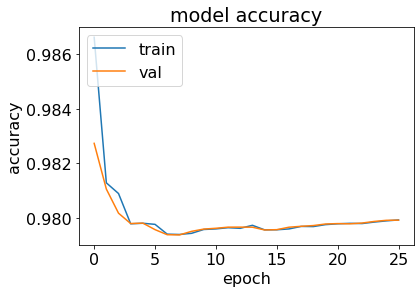

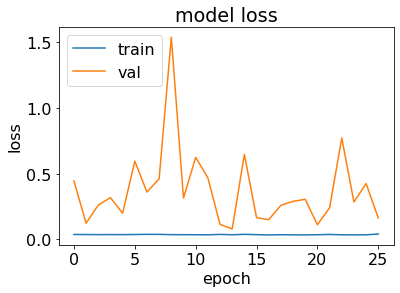

In [22]:
# list all data in history

history=results
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
def getIOU(trumask,predmask,smooth=0):
  intersection=K.cast(trumask*predmask,dtype='float32')
  union=trumask+predmask
  union=K.cast(union>0,dtype='float32')
  

  I=K.sum(intersection)
  U=K.sum(union)
  
  
  
  if smooth==1:
    IOUS=(I+1)/(U+1);
    return IOUS
  else:
    IOU=I/U
    return IOU

  #print(IOUS)


In [ ]:
def my_metric_fn(x, y):
    IOU=[]
    weights=[1.0,1.0,10.0]
    sumweights=tf.keras.backend.sum(weights)
    for ind in range(4):

   
      im1=x[ind,:,:,:]
      im2=y[ind,:,:,:]
      im2=K.argmax(im2,axis=2)
      channelIOU=[]
      for channelin in range(3):
          trumask=im1[:,:,channelin];
          predmask=im2==channelin;
          unWiegtedIou=getIOU(tf.keras.backend.cast(trumask,dtype='float32'),tf.keras.backend.cast(predmask,dtype='float32'),1)
          channelIOU.append(unWiegtedIou/sumweights*weights[channelin])
      #print(channelIOU)
      IOU.append(tf.keras.backend.mean(tf.keras.backend.cast(channelIOU,dtype='float32')))
      
    return tf.keras.backend.mean(tf.keras.backend.cast(IOU,dtype='float32'))  # Note the `axis=-1`

In [24]:
imsize=256
test_gen = data_gen('/content/drive/My Drive/ThesisDL/IOUsemSeg/test_frames/frames','/content/drive/My Drive/ThesisDL/IOUsemSeg/test_masks/mask', batch_size = 4,imsize=imsize)
from google.colab.patches import cv2_imshow
nucIOU=[]
area_real=[]
area_pred=[]
NO_OF_test_IMAGES = len(os.listdir('/content/drive/My Drive/ThesisDL/IOUsemSeg/test_frames/frames'))
steps=(NO_OF_test_IMAGES//4)
hold_all_ims=np.zeros((NO_OF_test_IMAGES, imsize, imsize, 3)).astype('float')
hold_all_tru=np.zeros((NO_OF_test_IMAGES, imsize, imsize, 3)).astype('float')
hold_all_pred=np.zeros((NO_OF_test_IMAGES, imsize, imsize)).astype('float')
count=0;
for step in range(steps):
  x,y=next(test_gen)
  ans=m.predict(x,steps=(1))

  for ind in range(4):

    im=x[ind,:,:,:]
    im1=y[ind,:,:,:]
    im2=ans[ind,:,:,:]
    im2=np.argmax(im2,axis=2)
  

    hold_all_ims[count]=im;
    hold_all_tru[count]=im1;
    hold_all_pred[count]=im2

    cv2_imshow(im*125)
    cv2_imshow(im1*250)
    cv2_imshow(im2*125)

    trumask=im1[:,:,2];
    predmask=im2>1;

    nucIOU.append(getIOU(trumask,predmask,1))
    area_real.append(np.sum(trumask))
    area_pred.append(np.sum(predmask))
    count+=1



Output hidden; open in https://colab.research.google.com to view.

32
92
18


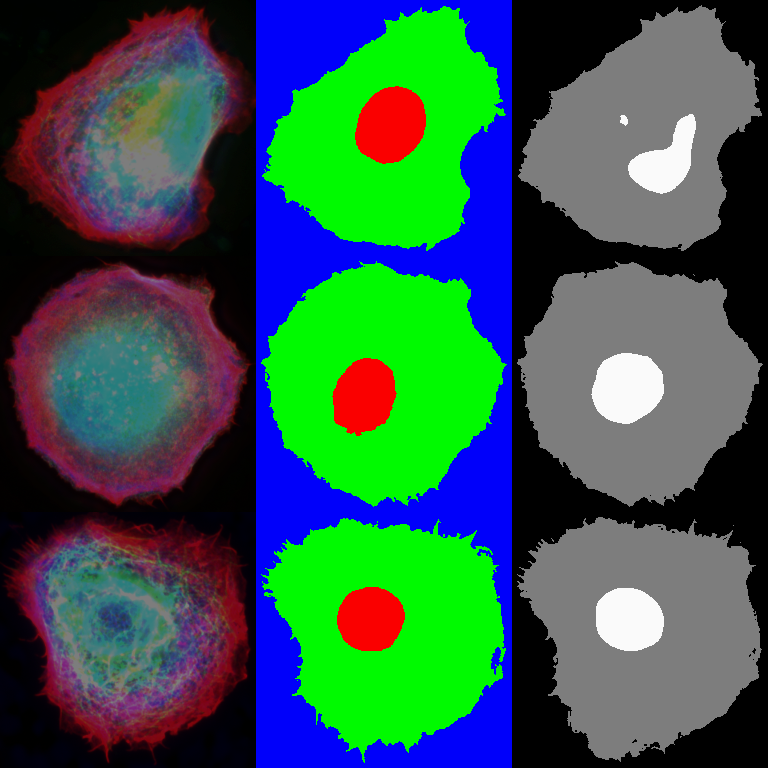

/content/drive/My Drive/ThesisDL/IOUsemSeg/my_model_256_WIOU_0.6650064.best-worst.png


SystemError: ignored

In [25]:

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#calculate locations but set manually for consistency
min_loc=(nucIOU.index(min(nucIOU)))
print(min_loc)
#min_loc=21
max_loc=(nucIOU.index(max(nucIOU)))
print(max_loc)
#max_loc=45
med_loc=(nucIOU.index(find_nearest(nucIOU,np.median(nucIOU))))
print(med_loc)
#med_loc=7

min_tru=hold_all_tru[min_loc]*250
max_tru=hold_all_tru[max_loc]*250
med_tru=hold_all_tru[med_loc]*250

min_pred=hold_all_pred[min_loc]
nu_min_pred=np.zeros((imsize,imsize,3)).astype('float')
nu_min_pred[:,:,0]=min_pred
nu_min_pred[:,:,1]=min_pred
nu_min_pred[:,:,2]=min_pred
nu_min_pred*=125
max_pred=hold_all_pred[max_loc]
nu_max_pred=np.zeros((imsize,imsize,3)).astype('float')
nu_max_pred[:,:,0]=max_pred
nu_max_pred[:,:,1]=max_pred
nu_max_pred[:,:,2]=max_pred
nu_max_pred*=125
med_pred=hold_all_pred[med_loc]
nu_med_pred=np.zeros((imsize,imsize,3)).astype('float')
nu_med_pred[:,:,0]=med_pred
nu_med_pred[:,:,1]=med_pred
nu_med_pred[:,:,2]=med_pred
nu_med_pred*=125


min_im=hold_all_ims[min_loc]*125
max_im=hold_all_ims[max_loc]*125
med_im=hold_all_ims[med_loc]*125

out_file=(cv2.vconcat([cv2.hconcat([min_im,min_tru,nu_min_pred]),cv2.hconcat([med_im,med_tru,nu_med_pred]),cv2.hconcat([max_im,max_tru,nu_max_pred])]))
cv2_imshow(out_file)
fname=('/content/drive/My Drive/ThesisDL/IOUsemSeg/my_model_' + str(imsize) + '_WIOU_'+ str(np.median(nucIOU))+'.best-worst.png')
print(fname)
cv2.imwrite(out_file,fname)


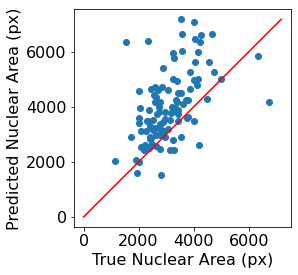

In [12]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
x=[0,np.max(area_pred)]
plt.plot(x,x,color='red')
plt.xlabel('True Nuclear Area (px)')
plt.ylabel('Predicted Nuclear Area (px)')
plt.scatter(area_real,area_pred)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
fname=('/content/drive/My Drive/ThesisDL/IOUsemSeg/my_model_' + str(imsize) + '_WIOU_'+ str(np.median(nucIOU))+'.png')
plt.savefig(fname, dpi=900, facecolor='w', edgecolor='b')

0.65904987


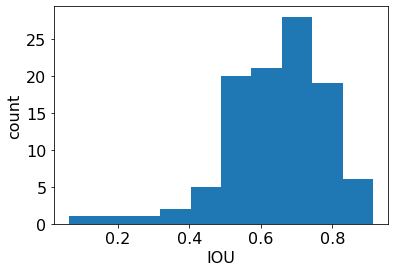

/content/drive/My Drive/ThesisDL/IOUsemSeg/my_model_256_WIOU_0.65904987
INFO:tensorflow:Assets written to: /content/drive/My Drive/ThesisDL/IOUsemSeg/my_model_256_WIOU_0.65904987/assets


<Figure size 432x288 with 0 Axes>

In [14]:
from matplotlib import pyplot as plt
print(np.median(nucIOU))
plt.hist(nucIOU)

plt.xlabel('IOU')
plt.ylabel('count')
plt.show()
fname=('/content/drive/My Drive/ThesisDL/IOUsemSeg/my_model_' + str(imsize) + '_WIOU_'+ str(np.median(nucIOU))+'HISTOGRAM.png')
plt.savefig(fname, dpi=900, facecolor='w', edgecolor='b')

from tensorflow.keras.utils import  plot_model
print(('/content/drive/My Drive/ThesisDL/IOUsemSeg/my_model_' + str(imsize) + '_WIOU_'+ str(np.median(nucIOU))))
m.save('/content/drive/My Drive/ThesisDL/IOUsemSeg/my_model_' + str(imsize) + '_WIOU_'+ str(np.median(nucIOU)))

#print(m.summary())

#plot_model(m, to_file='model_plot.png')

In [ ]:
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


img_path = '/content/drive/My Drive/ThesisDL/IOUsemSeg/test_frames/frames/compositeReg00035.tif'
img = image.load_img(img_path, target_size=(128, 128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)


layer_outputs = [layer.output for layer in m.layers[:40]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=m.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation

#first_layer_activation = activations[1]
##print(first_layer_activation.shape)
#plt.matshow(first_layer_activation[0,:, :, 0], cmap='viridis')

layer_names = []
num=40
for layer in m.layers[1:40]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure()
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
##Manually change UNET
#

import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(pretrained_weights = None,input_size = (128,128,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)

    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)

    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)

    pool21 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv31 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool21)
    conv31 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv31)

    pool3 = MaxPooling2D(pool_size=(2, 2))(conv31)
    conv4 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(2048, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(2048, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    up6 = Conv2D(1024, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))

    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    up7 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))

    merge71 = concatenate([conv31,up7], axis = 3)
    conv71 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge71)
    conv71 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv71)
    up81 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv71))

    merge7 = concatenate([conv3,up81], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))

    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))

    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(3, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(3, 1, activation = 'softmax',padding='same')(conv9)

    model = Model(input = inputs, output = conv10)

    #model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = [tf.keras.metrics.MeanIoU(num_classes=3)])
    model.compile('Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model
#imsize=512
#m =unet(pretrained_weights = None,input_size = (imsize,imsize,3))
#print(m.summary())

#plot_model(m)